<a href="https://colab.research.google.com/github/aounallahsara/ML_models/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

maze = np.array([
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 0]
])

start = (0, 0)
goal = (9, 9)

In [ ]:
num_episodes = 5000
alpha = 0.1
gamma = 0.9
epsilon = 0.5

reward_fire = -10
reward_goal = 50
reward_step = -1

actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

Q = np.zeros(maze.shape + (len(actions),))

In [ ]:
def is_valid(pos):
    r, c = pos
    if r < 0 or r >= maze.shape[0]:
        return False
    if c < 0 or c >= maze.shape[1]:
        return False
    if maze[r, c] == 1:
        return False
    return True


def choose_action(state):
    if np.random.random() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

In [ ]:
rewards_all_episodes = []

for episode in range(num_episodes):
    state = start
    total_rewards = 0
    done = False

    while not done:
        action_index = choose_action(state)
        action = actions[action_index]

        next_state = (state[0] + action[0], state[1] + action[1])

        if not is_valid(next_state):
            reward = reward_fire
            done = True
        elif next_state == goal:
            reward = reward_goal
            done = True
        else:
            reward = reward_step

        old_value = Q[state][action_index]
        next_max = np.max(Q[next_state]) if is_valid(next_state) else 0

        Q[state][action_index] = old_value + alpha * \
            (reward + gamma * next_max - old_value)

        state = next_state
        total_rewards += reward

    epsilon = max(0.01, epsilon * 0.995)
    rewards_all_episodes.append(total_rewards)

In [ ]:
def get_optimal_path(Q, start, goal, actions, maze):
    path = [start]
    state = start

    while state != goal:

        q_values = Q[state]

        best_action_idx = np.argmax(q_values)
        best_action = actions[best_action_idx]

        next_state = (state[0] + best_action[0], state[1] + best_action[1])


        if not (0 <= next_state[0] < maze.shape[0] and
                                       0 <= next_state[1] < maze.shape[1]) or !maze[next_state] == 1:
            print("Warning: Stuck or invalid move! Training may not have converged.")
            break

        path.append(next_state)
        state = next_state


        if len(path) > 1000:
            print("Path too long, likely loop.")
            break

    return path

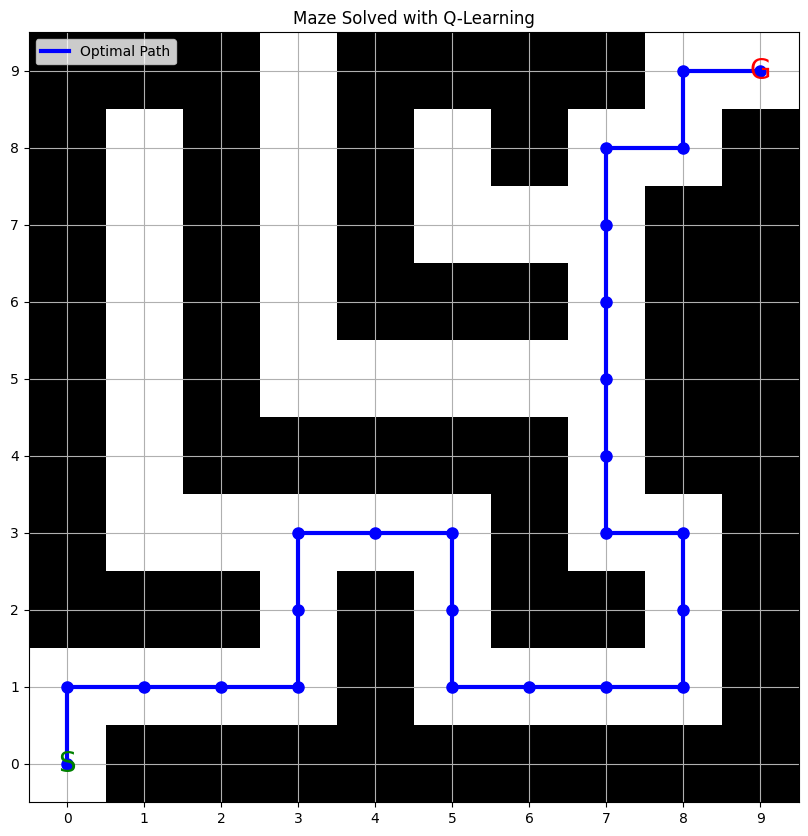

Optimal path length: 25 steps
Path: [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (8, 8), (9, 8), (9, 9)]


In [ ]:
optimal_path = get_optimal_path(Q, start, goal, actions, maze)

cmap = ListedColormap(['white', 'black'])
plt.figure(figsize=(10,10))
plt.imshow(maze, cmap=cmap)

plt.text(start[1], start[0], 'S', fontsize=20, ha='center', va='center', color='green')
plt.text(goal[1], goal[0], 'G', fontsize=20, ha='center', va='center', color='red')


if optimal_path and optimal_path[-1] == goal:
    path_array = np.array(optimal_path)
    plt.plot(path_array[:, 1], path_array[:, 0], 'b-', linewidth=3, label='Optimal Path')
    plt.plot(path_array[:, 1], path_array[:, 0], 'bo', markersize=8)

plt.title("Maze Solved with Q-Learning")
plt.grid(True)
plt.xticks(range(maze.shape[1]))
plt.yticks(range(maze.shape[0]))
plt.gca().invert_yaxis()
plt.legend()
plt.show()

print(f"Optimal path length: {len(optimal_path)} steps")
print(f"Path: {optimal_path}")

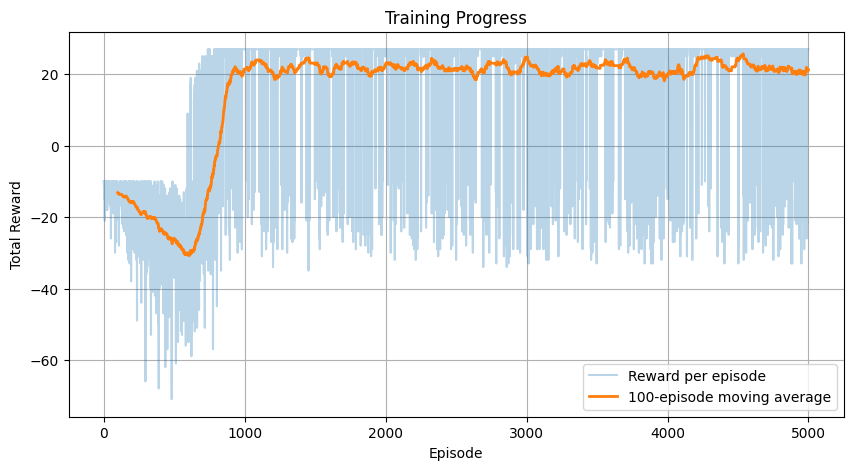

In [ ]:
window = 100
rewards = np.array(rewards_all_episodes)

if len(rewards) >= window:
    mov_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
else:
    mov_avg = rewards

plt.figure(figsize=(10, 5))
plt.plot(rewards, alpha=0.3, label="Reward per episode")
plt.plot(range(window-1, window-1+len(mov_avg)), mov_avg, lw=2,
         label=f"{window}-episode moving average")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress")
plt.legend()
plt.grid(True)
plt.show()
